In [36]:
# Imports
import numpy as np
import pandas as pd
import plotly.express as px

# Inline Plots
%matplotlib inline

In [37]:
# Read-in .csv file
emissions_dataset = pd.read_csv('./data/co2-emissions.csv')

# Get dataframe info
emissions_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                31349 non-null  object 
 1   Code                  24974 non-null  object 
 2   Year                  31349 non-null  int64  
 3   Annual CO₂ emissions  31349 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 979.8+ KB


In [38]:
# Drop unnecessary column: Code
emissions_dataset = emissions_dataset.drop(columns='Code')

In [39]:
# Rename columns
emissions_dataset.columns = ['Location', 'Year', 'Emissions']

In [40]:
# Filter rows into new dataframe: global_emissions
global_emissions = emissions_dataset.loc[emissions_dataset['Location'] == 'World']

In [41]:
# Preview dataframe
global_emissions.head()

,Location,Year,Emissions
30814,World,1750,9350528.0
30815,World,1751,9350528.0
30816,World,1752,9354192.0
30817,World,1753,9354192.0
30818,World,1754,9357856.0


In [42]:
# Drop unnecessary column: Location
global_emissions = global_emissions.drop(columns='Location')

In [44]:
# Convert Year to datetime format
global_emissions['Year'] = pd.to_datetime(global_emissions['Year'].astype(str), format='%Y')

In [45]:
# Set index to Year(datetime)
global_emissions.set_index('Year')

,Emissions
Year,
1750-01-01,9.350528e+06
1751-01-01,9.350528e+06
1752-01-01,9.354192e+06
1753-01-01,9.354192e+06
1754-01-01,9.357856e+06
...,...
2017-01-01,3.609674e+10
2018-01-01,3.682651e+10
2019-01-01,3.708256e+10


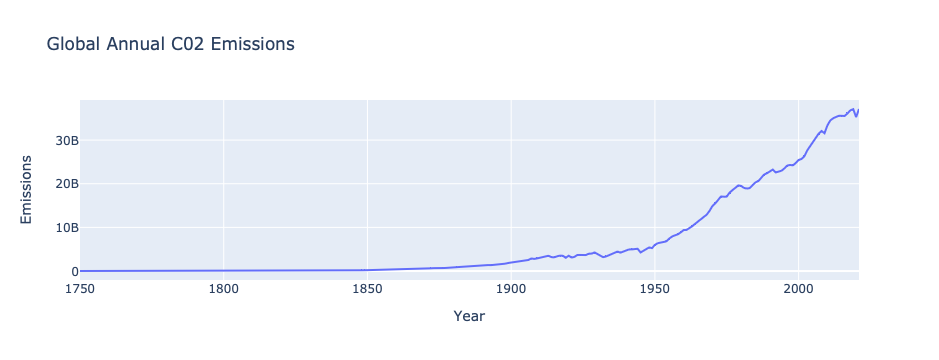

In [46]:
plot = px.line(global_emissions, x='Year', y='Emissions', title='Global Annual C02 Emissions')
plot.show()